In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [2]:
df = pd.read_csv("/Users/sultanahaldawsari/Desktop/CarPrice_Assignment.csv")

# Data Inspecting

In [4]:
df.head()b

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.describe()
#descibe for our whole dataset

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.price.describe
#This is a statistical describe for Price aka our target

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
df.info()
#This indicates that we have 205 observations and 26 columns, 16 of them are numeric and 10 are objects 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.isna().sum()
#No null values in our dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Cleaning
Check if there are any Missing Data, Outliers, Data Inconsistent, Data Duplicate, Data Type Issues


In [15]:
sum(df.duplicated(subset = 'car_ID')) == 0
#This indicates that we don't have any duplicated values

True

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [112]:
df_nums = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg']]

In [113]:
#outliers cleaning using z-score
z = np.abs(stats.zscore(df_nums))
print(z)

[[1.6907718  0.42652147 0.84478235 ... 0.26296022 0.64655303 0.54605874]
 [1.6907718  0.42652147 0.84478235 ... 0.26296022 0.64655303 0.54605874]
 [0.70859588 0.23151305 0.19056612 ... 0.26296022 0.95301169 0.69162706]
 ...
 [1.72187336 1.19854871 1.39824472 ... 0.78785546 1.10624102 1.12833203]
 [1.72187336 1.19854871 1.39824472 ... 0.68328649 0.11959362 0.54605874]
 [1.72187336 1.19854871 1.39824472 ... 0.57769233 0.95301169 0.83719538]]


In [114]:
threshold = 3
print(np.where(z > 3))

(array([ 18,  18,  30,  30,  47,  48,  49,  49,  63,  73,  73,  74,  90,
       111, 113, 129, 134, 158, 159, 165, 166, 174, 182, 184, 187, 192,
       203]), array([11, 12, 11, 12,  5,  5,  5,  9,  8,  0,  5,  5, 11,  7,  7,  9,  7,
        8,  8, 10, 10,  8,  8,  8,  8,  8,  8]))


In [115]:
df_cleaned = df_nums[(z < 3).all(axis=1)]

In [116]:
df_cleaned

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23


<AxesSubplot:>

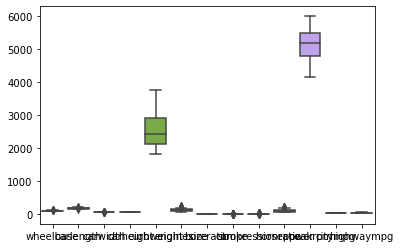

In [117]:
sns.boxplot(data = df_cleaned)

In [118]:
# outliers cleaning using IQR
Q1 = df_nums.quantile(0.25)
Q3 = df_nums.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

wheelbase             7.90
carlength            16.80
carwidth              2.80
carheight             3.50
curbweight          790.00
enginesize           44.00
boreratio             0.43
stroke                0.30
compressionratio      0.80
horsepower           46.00
peakrpm             700.00
citympg              11.00
highwaympg            9.00
dtype: float64


In [119]:
df_out = df_nums[~((df_nums < (Q1 - 1.5 * IQR)) |(df_nums > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(139, 13)

<AxesSubplot:>

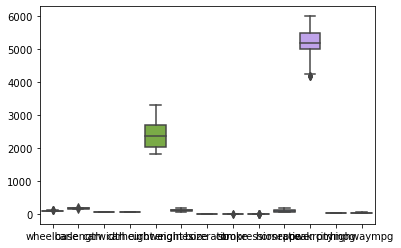

In [120]:
sns.boxplot(data = df_out)

In [121]:
scaled_df = df_nums[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg']]

In [141]:
#Scaling features, it's important so that predictors have a mean of zero.
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg','price']

scaled_df[num_vars] = scaler.fit_transform(scaled_df[num_vars])

In [144]:
scaled_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


Text(0.5, 1.0, 'Scaled data')

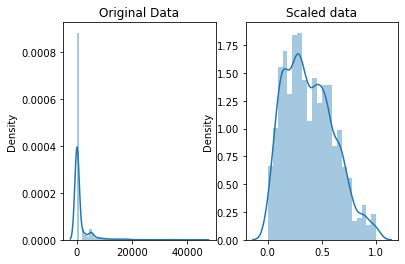

In [145]:
fig, ax=plt.subplots(1,2)
sns.distplot(df_nums, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_df, ax=ax[1])
ax[1].set_title("Scaled data")

In [125]:
scaled_df['price'] = df['price']

In [127]:
df_nums['price'] = df['price']

# Expolarity Data Analysis (EDA)

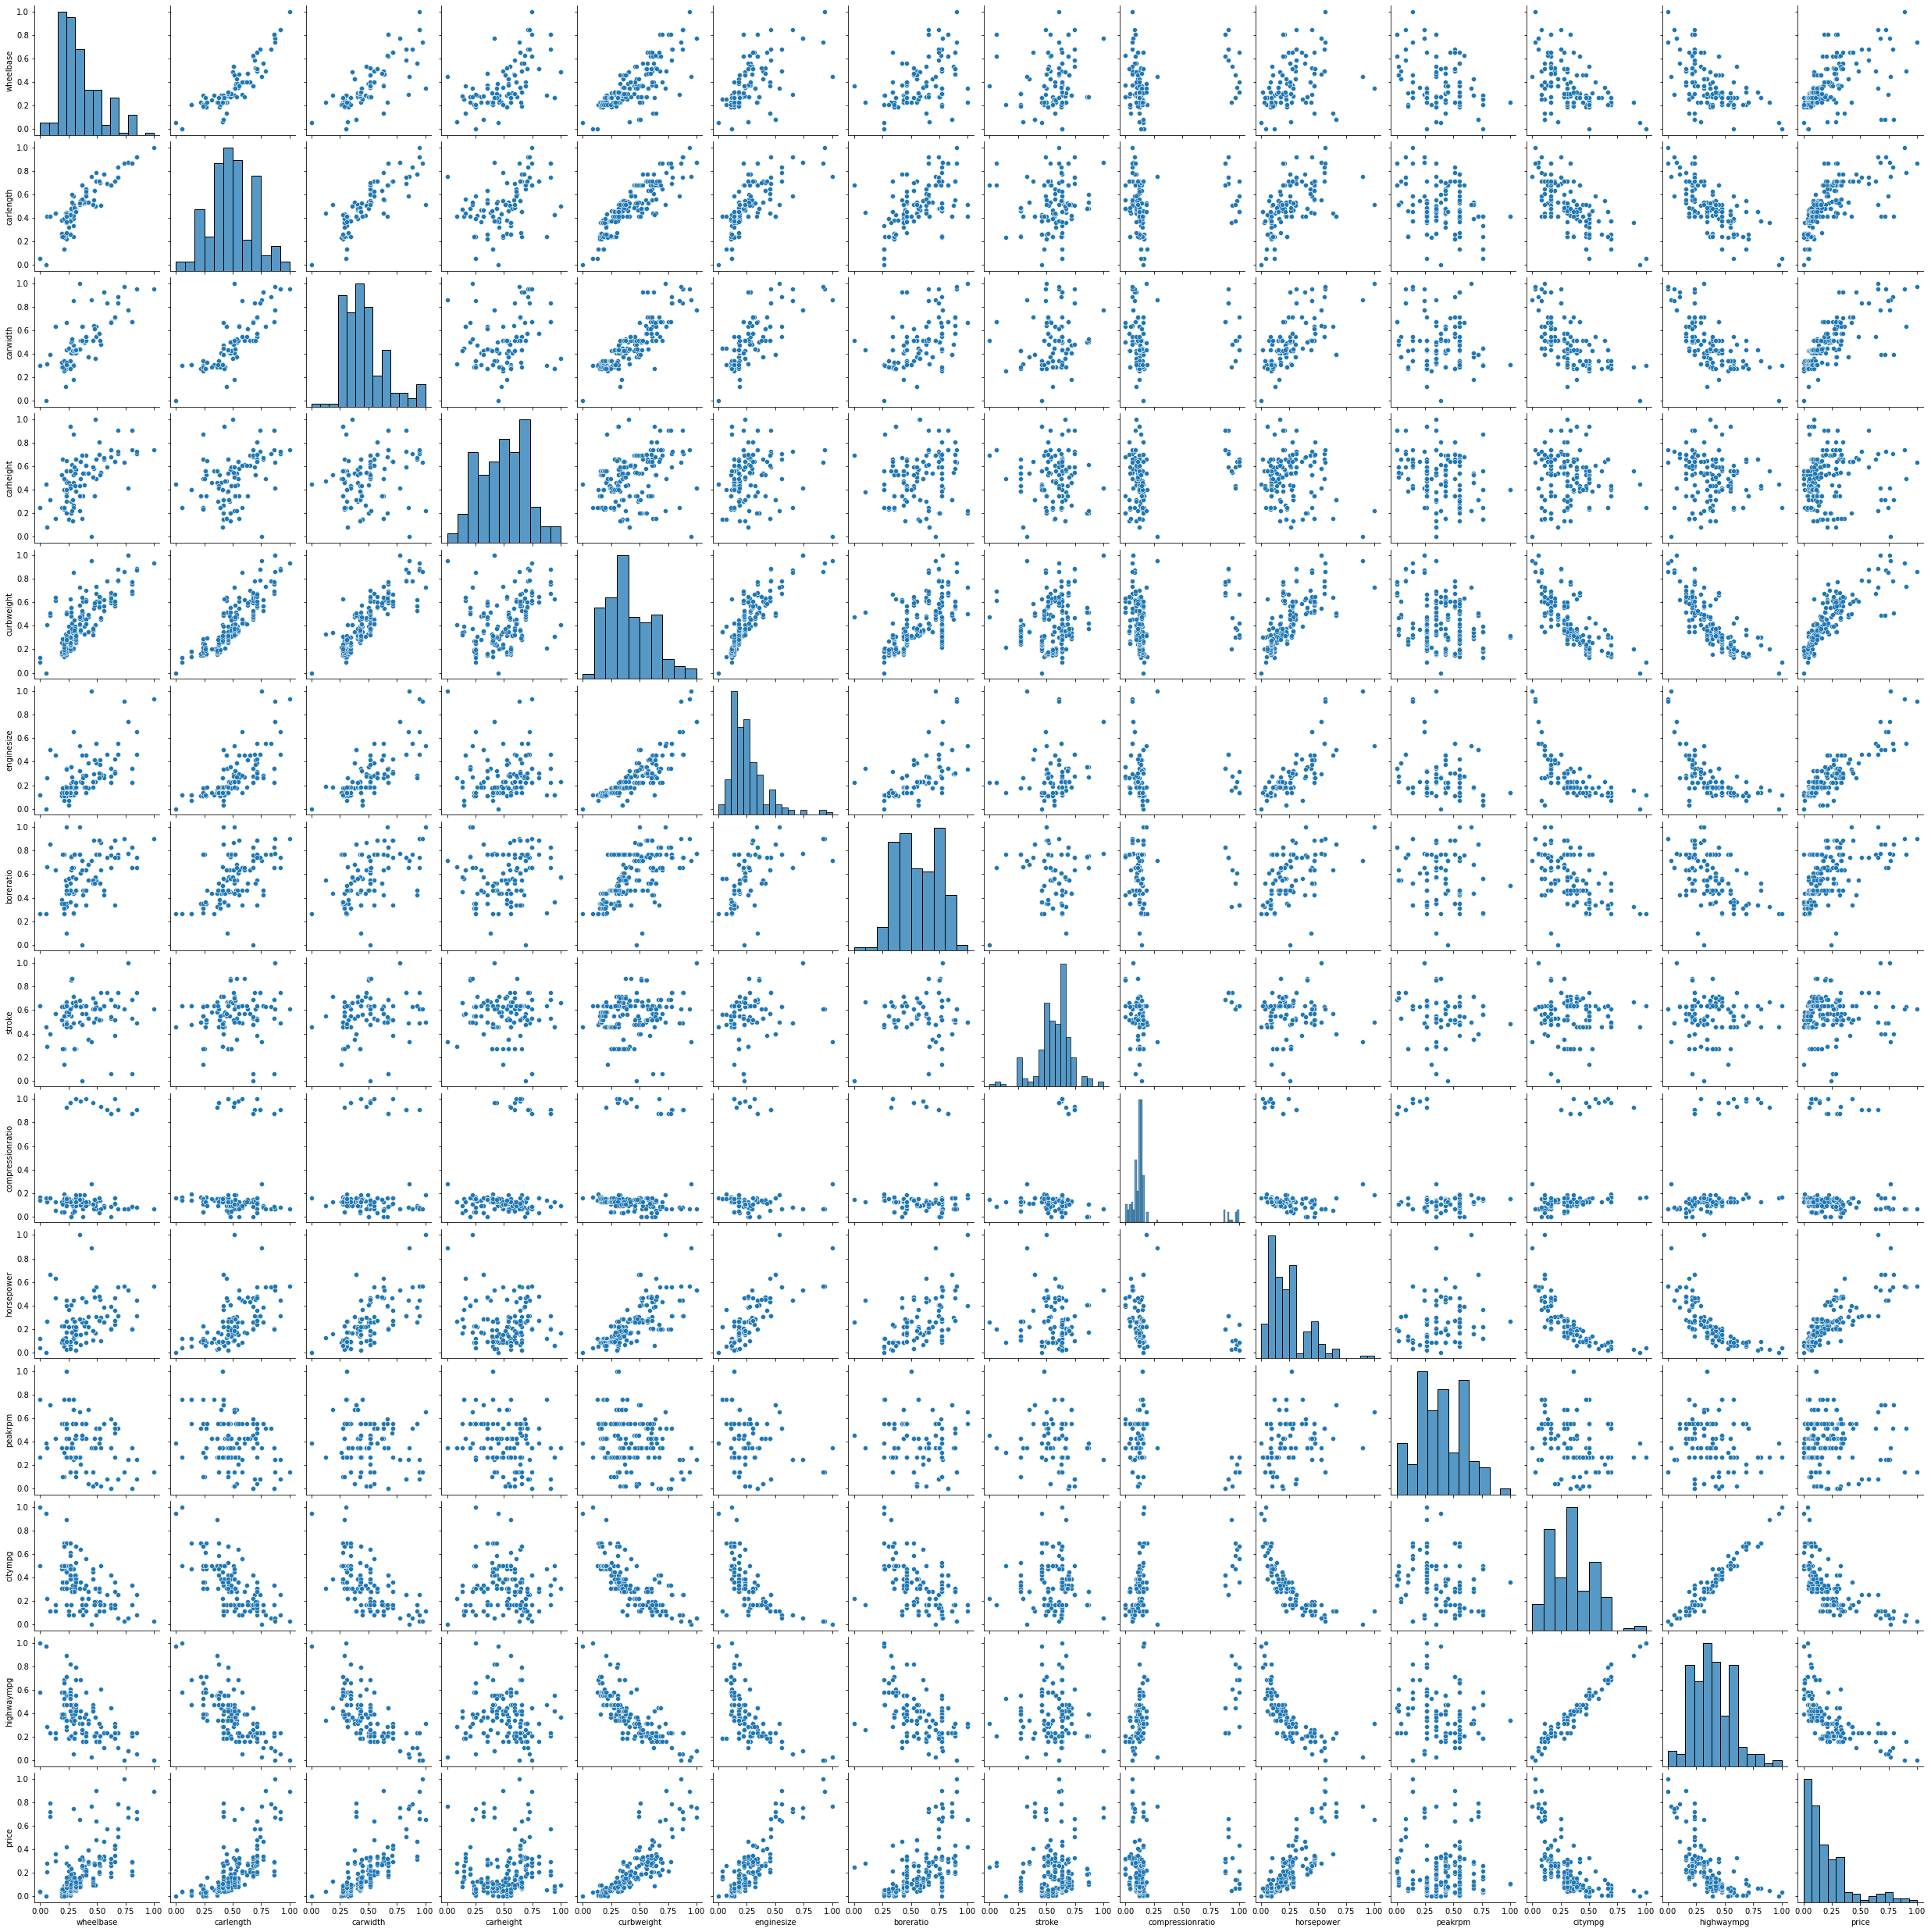

In [147]:
sns.pairplot(scaled_df)

<AxesSubplot:>

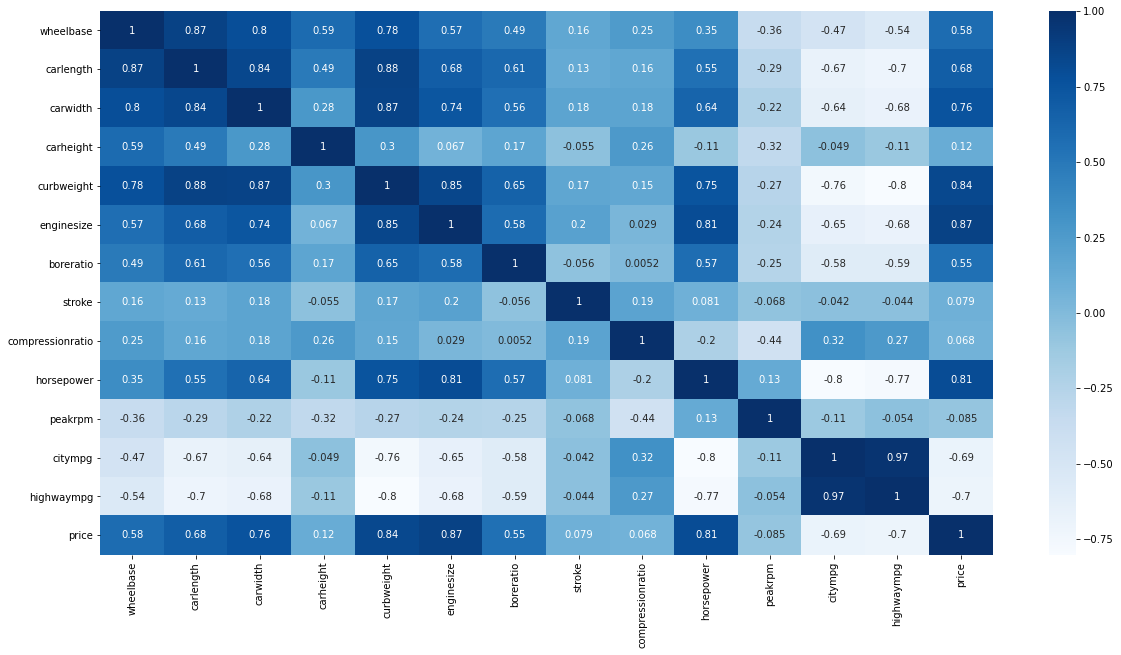

In [146]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(scaled_df.corr(),cmap='Blues',annot=True)

In [133]:
#create a new column named price containing car name 
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [135]:
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')

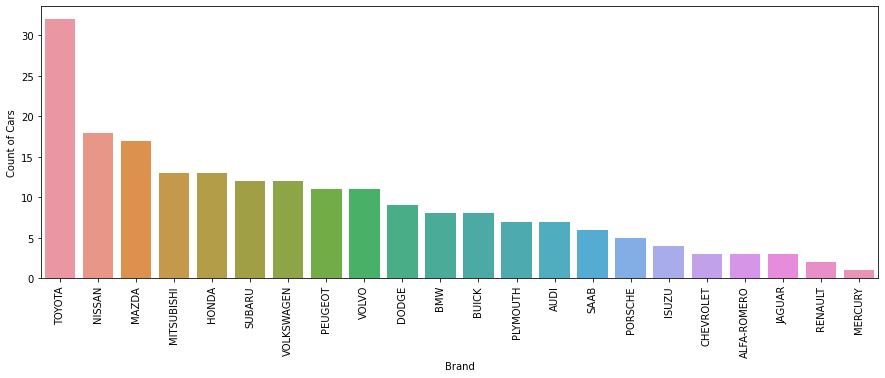

<Figure size 432x288 with 0 Axes>

In [136]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='price', ylabel='Density'>

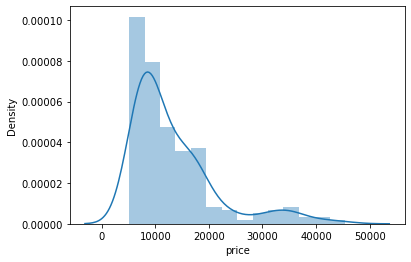

In [137]:
sns.distplot(df['price'])

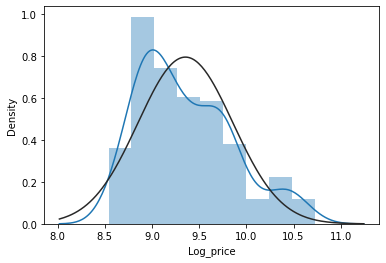

<Figure size 432x288 with 0 Axes>

In [148]:
#Log for price 
scaled_df['Log_price'] = np.log(df['price'])
sns.distplot(scaled_df['Log_price'], fit=norm)
fig = plt.figure();

# Data Prepration

In [153]:
df2 = df[['fueltype', 'aspiration', 'carbody', 'drivewheel','brand']]

In [158]:
auto = pd.concat([auto ,scaled_df],axis = 1)

In [159]:
auto = pd.concat([auto,df2], axis = 1)

In [160]:
auto

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,peakrpm,citympg,highwaympg,price,Log_price,fueltype,aspiration,carbody,drivewheel,brand
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,...,0.346939,0.222222,0.289474,0.207959,9.510075,gas,std,convertible,rwd,ALFA-ROMERO
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,...,0.346939,0.222222,0.289474,0.282558,9.711116,gas,std,convertible,rwd,ALFA-ROMERO
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,...,0.346939,0.166667,0.263158,0.282558,9.711116,gas,std,hatchback,rwd,ALFA-ROMERO
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,...,0.551020,0.305556,0.368421,0.219254,9.543235,gas,std,sedan,fwd,AUDI
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,...,0.551020,0.138889,0.157895,0.306142,9.767095,gas,std,sedan,4wd,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,...,0.510204,0.277778,0.315789,0.291123,9.731809,gas,std,sedan,rwd,VOLVO
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,...,0.469388,0.166667,0.236842,0.345738,9.854560,gas,turbo,sedan,rwd,VOLVO
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,...,0.551020,0.138889,0.184211,0.406311,9.975110,gas,std,sedan,rwd,VOLVO
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,...,0.265306,0.361111,0.289474,0.430763,10.019936,diesel,turbo,sedan,rwd,VOLVO


In [164]:
auto.drop(['price'], axis = 1, inplace = True)

In [165]:
cyl_no = pd.get_dummies(df['cylindernumber'], drop_first = True)
auto = pd.concat([auto,cyl_no], axis = 1)

In [166]:
door_no = pd.get_dummies(df['doornumber'], drop_first = True)
auto = pd.concat([auto,door_no], axis = 1)

In [167]:
aspi = pd.get_dummies(df['aspiration'], drop_first = True)
auto= pd.concat([auto,aspi], axis = 1)

In [168]:
car_body = pd.get_dummies(df['carbody'], drop_first = True)
auto= pd.concat([auto,car_body], axis = 1)

In [169]:
drive_wheel = pd.get_dummies(df['drivewheel'], drop_first = True)
auto = pd.concat([auto,drive_wheel], axis = 1)

In [170]:
engType = pd.get_dummies(df['enginetype'], drop_first = True)
auto = pd.concat([auto,engType], axis = 1)

In [171]:
brand = pd.get_dummies(df['brand'], drop_first = True)
auto = pd.concat([auto,brand], axis = 1)

In [173]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel','brand'], axis = 1, inplace = True)

In [175]:
auto.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'Log_price', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'Log_price', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'two', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'AUDI', 'BMW', 'BUICK', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAZDA', 'MERCURY', 'MITSUBISHI', 'NISSAN', 'PEUGEOT',
       'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO'],
      dtype='object')

# Modeling


##### Model 1

In [177]:
features, target = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'two', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'AUDI', 'BMW', 'BUICK', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAZDA', 'MERCURY', 'MITSUBISHI', 'NISSAN', 'PEUGEOT',
       'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO'], 'Log_price'
x, y = auto[features], auto[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(x, y) #fit model to our choice of features
preds = lm.predict(x)

In [178]:
preds = lm.predict(x)

In [179]:
print('MAE', metrics.mean_absolute_error(y, preds))
print('MSE', metrics.mean_squared_error(y, preds))
print('RMSE', np.sqrt(metrics.mean_squared_error(y, preds)))

MAE 0.08022810080594449
MSE 0.01057210268670636
RMSE 0.10282073082168965


##### Model 2

In [182]:
features, target = ['wheelbase', 'carlength','carwidth','carheight','carheight', 'curbweight'], 'Log_price'
x, y = auto[features], auto[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(x, y) #fit model to our choice of features
preds = lm.predict(x)

In [185]:
print('MAE', metrics.mean_absolute_error(y, preds))
print('MSE', metrics.mean_squared_error(y, preds))
print('RMSE', np.sqrt(metrics.mean_squared_error(y, preds)))

MAE 0.15303625064627938
MSE 0.045941733263545594
RMSE 0.2143402278237699


# Evaluation

Text(0.5, 0.98, 'y, preds')

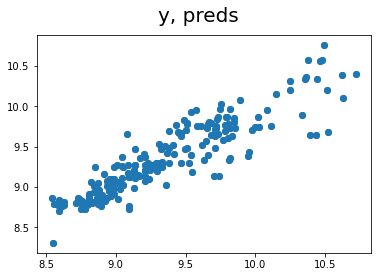

In [186]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y, preds)
fig.suptitle('y, preds', fontsize=20)

Text(0.5, 0, 'Errors')

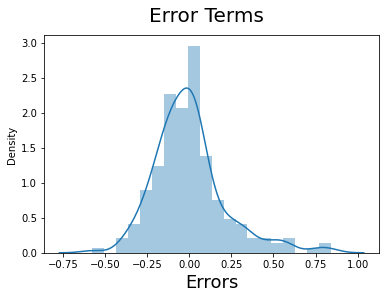

In [191]:
fig = plt.figure()
sns.distplot((y - preds), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)    